## Concentration gradients near downstream side of canyon head for tracers varying N and f

In [1]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

import matplotlib.cm as cm

from math import *

from mpl_toolkits.mplot3d.axes3d import Axes3D

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl

import os 

import sys

import seaborn as sns



In [2]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 

#lib_path = os.path.abspath('/Users/anakarinarm/SubmarineCanyonsResearch/PythonModulesMITgcm') # Add absolute path to my python scripts

#sys.path.append(lib_path)

#import ReadOutTools_MITgcm as rout 


In [3]:
sns.set()
sns.set_style('white')
sns.set_context('talk')

In [4]:
#Base case, iso =1 , No 3d diff.
#CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
CanyonGridOut = Dataset(CanyonGrid)

CanyonState='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)

Ptracer03='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/ptracersGlob.nc'
Ptracer14='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run14/ptracersGlob.nc'
Ptracer15='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run15/ptracersGlob.nc'
Ptracer16='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run16/ptracersGlob.nc'
Ptracer18='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run18/ptracersGlob.nc'
Ptracer19='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run19/ptracersGlob.nc'



In [5]:
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 

xc = rout.getField(CanyonGrid, 'XC') # x coords tracer cells
yc = rout.getField(CanyonGrid, 'YC') # y coords tracer cells
rc = CanyonGridOut.variables['RC']
bathy = rout.getField(CanyonGrid, 'Depth')

hFacC = rout.getField(CanyonGrid, 'HFacC')
MaskC = rout.getMask(CanyonGrid, 'HFacC')

z = CanyonStateOut.variables['Z']



In [6]:
Tr1 = rout.getField(Ptracer03,'Tr1') # 
Tr2 = rout.getField(Ptracer14,'Tr1')
Tr3 = rout.getField(Ptracer15,'Tr1')
Tr4 = rout.getField(Ptracer16,'Tr1')
Tr5 = rout.getField(Ptracer18,'Tr1')
Tr6 = rout.getField(Ptracer19,'Tr1')


In [7]:
MaskExp = np.expand_dims(MaskC,0)

MaskTr = MaskExp + np.zeros(Tr1.shape)

Tr1Masked = np.ma.masked_array(Tr1,mask = MaskTr) 
Tr2Masked = np.ma.masked_array(Tr2,mask = MaskTr) 
Tr3Masked = np.ma.masked_array(Tr3,mask = MaskTr) 
Tr4Masked = np.ma.masked_array(Tr4,mask = MaskTr) 
Tr5Masked = np.ma.masked_array(Tr5,mask = MaskTr) 
Tr6Masked = np.ma.masked_array(Tr6,mask = MaskTr) 

MaxTr1 = np.max(Tr1Masked)
MaxTr2 = np.max(Tr2Masked)
MaxTr3 = np.max(Tr3Masked)
MaxTr4 = np.max(Tr4Masked)
MaxTr5 = np.max(Tr5Masked)
MaxTr6 = np.max(Tr6Masked)


/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


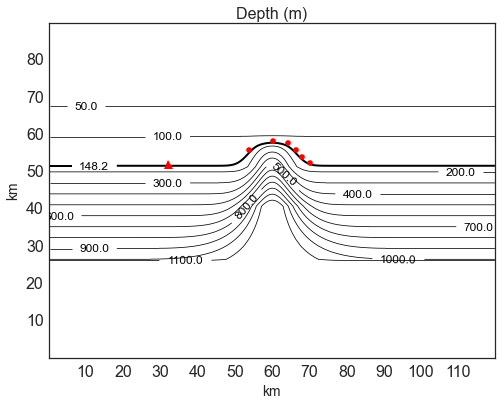

In [8]:
sns.set(context='paper', style='white', font='sans-serif', font_scale=2)

fig = plt.figure(figsize=(8,6))

lev = range(200,1200,100)

levels = [50,100,148.17]+lev
CS = plt.contour(xc,yc,bathy,levels,colors='k',linewidths=[0.75,0.75,2,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75] )

plt.clabel(CS, 
           inline=1,
          fmt='%1.1f',
           fontsize=12)

plt.plot(xc[262,180],yc[262,180],'ro',
         xc[259,210],yc[259,210],'ro',
         xc[250,223],yc[250,223],'ro',
         xc[240,232],yc[240,232],'ro',
         xc[231,242],yc[231,242],'ro',
         xc[250,137],yc[250,137],'ro')

plt.plot(xc[230,60],yc[230,60],'r^', markersize=9)

plt.xticks(np.arange(0,120000,10000), [' ','10','20','30','40','50','60','70','80','90','100','110','120'])
plt.yticks(np.arange(0,90000,10000), [' ','10','20','30','40','50','60','70','80','90'])

plt.xlabel('km',fontsize=14)
plt.ylabel('km',fontsize=14)

plt.title('Depth (m)',fontsize=16)



The red dots on the figure correspond to the stations where I will look at vertical concentration profiles. Stations named A-E from centre to right. The station on the left side (upstream) is called 'Up' and it is there for comparison.

In [9]:
#station indices

ys = [250,262,259,250,240,231]
xs = [137,180,210,223,232,242]
Station = ['Up','A','B','C','D','E']

In [10]:
def PlotProfiles(Tr,palette,Trname,Station,ys,xs):
    
    sns.set(context='talk', style='dark', font='sans-serif', font_scale=1)

    times = [2,4,6,8,10]


    with sns.color_palette(palette,7):
        fig,((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10)) = plt.subplots(2, 5, figsize=(25, 12))

        for ii in range(len(Station)):
      
            ax1.plot(Tr[0,:,ys[ii],xs[ii]],z[:],label = Station[ii])
            ax1.set_title(' %s Day 0 ' %Trname)
            ax1.set_ylabel('Depth (m)')
            ax1.legend(loc=0)
     
            ax2.plot(Tr[2,:,ys[ii],xs[ii]],z[:])
            ax2.plot(Tr[0,:,ys[ii],xs[ii]],z[:],'k--',linewidth=0.5)
            ax2.set_title(' Day 1 ')
            
            ax3.plot(Tr[4,:,ys[ii],xs[ii]],z[:])
            ax3.plot(Tr[0,:,ys[ii],xs[ii]],z[:],'k--',linewidth=0.5)
            ax3.set_title(' Day 2 ')
            
            ax4.plot(Tr[6,:,ys[ii],xs[ii]],z[:])
            ax4.plot(Tr[0,:,ys[ii],xs[ii]],z[:],'k--',linewidth=0.5)
            ax4.set_title(' Day 3 ')
            
            ax5.plot(Tr[8,:,ys[ii],xs[ii]],z[:])
            ax5.plot(Tr[0,:,ys[ii],xs[ii]],z[:],'k--',linewidth=0.5)
            ax5.set_title(' Day 4 ')
            
            ax6.plot(Tr[10,:,ys[ii],xs[ii]],z[:])
            ax6.plot(Tr[0,:,ys[ii],xs[ii]],z[:],'k--',linewidth=0.5)
            ax6.set_title(' Day 5 ')
            ax6.set_xlabel('Concentration (mol/l)')
     
            ax7.plot(Tr[12,:,ys[ii],xs[ii]],z[:])
            ax7.plot(Tr[0,:,ys[ii],xs[ii]],z[:],'k--',linewidth=0.5)
            ax7.set_title(' Day 6 ')
            ax7.set_xlabel('Concentration (mol/l)')
        
            ax8.plot(Tr[14,:,ys[ii],xs[ii]],z[:])
            ax8.plot(Tr[0,:,ys[ii],xs[ii]],z[:],'k--',linewidth=0.5)
            ax8.set_title(' Day 7 ')
            ax8.set_xlabel('Concentration (mol/l)')
        
            ax9.plot(Tr[16,:,ys[ii],xs[ii]],z[:])
            ax9.plot(Tr[0,:,ys[ii],xs[ii]],z[:],'k--',linewidth=0.5)
            ax9.set_title(' Day 8 ')
            ax9.set_xlabel('Concentration (mol/l)')
     
            ax10.plot(Tr[18,:,ys[ii],xs[ii]],z[:])
            ax10.plot(Tr[0,:,ys[ii],xs[ii]],z[:],'k--',linewidth=0.5)
            ax10.set_title(' Day 9 ')
            ax10.set_xlabel('Concentration (mol/l)')
     
     
     
    plt.show()

    #fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')

In [11]:
def PlotProfilesAnom(Tr,palette,Trname,Station,ys,xs):
    
    sns.set(context='talk', style='dark', font='sans-serif', font_scale=1)

    times = [2,4,6,8,10]


    with sns.color_palette(palette,7):
        fig,((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10)) = plt.subplots(2, 5, figsize=(25, 12))

        for ii in range(len(Station)):
      
            ax1.plot(Tr[0,:,ys[ii],xs[ii]]-Tr[0,:,ys[ii],xs[ii]],z[:],label = Station[ii])
            ax1.axvline(x=0.0,color='k',linestyle ='dashed',linewidth=0.5)
            ax1.set_title(' %s-Initial Day 0 ' %Trname )
            ax1.set_ylabel('Depth (m)')
            ax1.legend(loc=0)
     
            ax2.plot(Tr[2,:,ys[ii],xs[ii]]-Tr[0,:,ys[ii],xs[ii]],z[:])
            ax2.axvline(x=0.0,color='k',linestyle ='dashed',linewidth=0.5)
            ax2.set_title(' Day 1 ')
            
            ax3.plot(Tr[4,:,ys[ii],xs[ii]]-Tr[0,:,ys[ii],xs[ii]],z[:])
            ax3.axvline(x=0.0,color='k',linestyle ='dashed',linewidth=0.5)
            ax3.set_title(' Day 2 ')
            
            ax4.plot(Tr[6,:,ys[ii],xs[ii]]-Tr[0,:,ys[ii],xs[ii]],z[:])
            ax4.axvline(x=0.0,color='k',linestyle ='dashed',linewidth=0.5)
            ax4.set_title(' Day 3 ')
            
            ax5.plot(Tr[8,:,ys[ii],xs[ii]]-Tr[0,:,ys[ii],xs[ii]],z[:])
            ax5.axvline(x=0.0,color='k',linestyle ='dashed',linewidth=0.5)
            ax5.set_title(' Day 4 ')
            
            ax6.plot(Tr[10,:,ys[ii],xs[ii]]-Tr[0,:,ys[ii],xs[ii]],z[:])
            ax6.axvline(x=0.0,color='k',linestyle ='dashed',linewidth=0.5)
            ax6.set_title(' Day 5 ')
            ax6.set_xlabel('Concentration (mol/l)')
     
            ax7.plot(Tr[12,:,ys[ii],xs[ii]]-Tr[0,:,ys[ii],xs[ii]],z[:])
            ax7.axvline(x=0.0,color='k',linestyle ='dashed',linewidth=0.5)
            ax7.set_title(' Day 6 ')
            ax7.set_xlabel('Concentration (mol/l)')
        
            ax8.plot(Tr[14,:,ys[ii],xs[ii]]-Tr[0,:,ys[ii],xs[ii]],z[:])
            ax8.axvline(x=0.0,color='k',linestyle ='dashed',linewidth=0.5)
            ax8.set_title(' Day 7 ')
            ax8.set_xlabel('Concentration (mol/l)')
        
            ax9.plot(Tr[16,:,ys[ii],xs[ii]]-Tr[0,:,ys[ii],xs[ii]],z[:])
            ax9.axvline(x=0.0,color='k',linestyle ='dashed',linewidth=0.5)
            ax9.set_title(' Day 8 ')
            ax9.set_xlabel('Concentration (mol/l)')
     
            ax10.plot(Tr[18,:,ys[ii],xs[ii]]-Tr[0,:,ys[ii],xs[ii]],z[:])
            ax10.axvline(x=0.0,color='k',linestyle ='dashed',linewidth=0.5)
            ax10.set_title(' Day 9 ')
            ax10.set_xlabel('Concentration (mol/l)')
     
     
     
    plt.show()

    #fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')

### Tracer 1 - CNT $kv = 10^{-5} m^2/s$

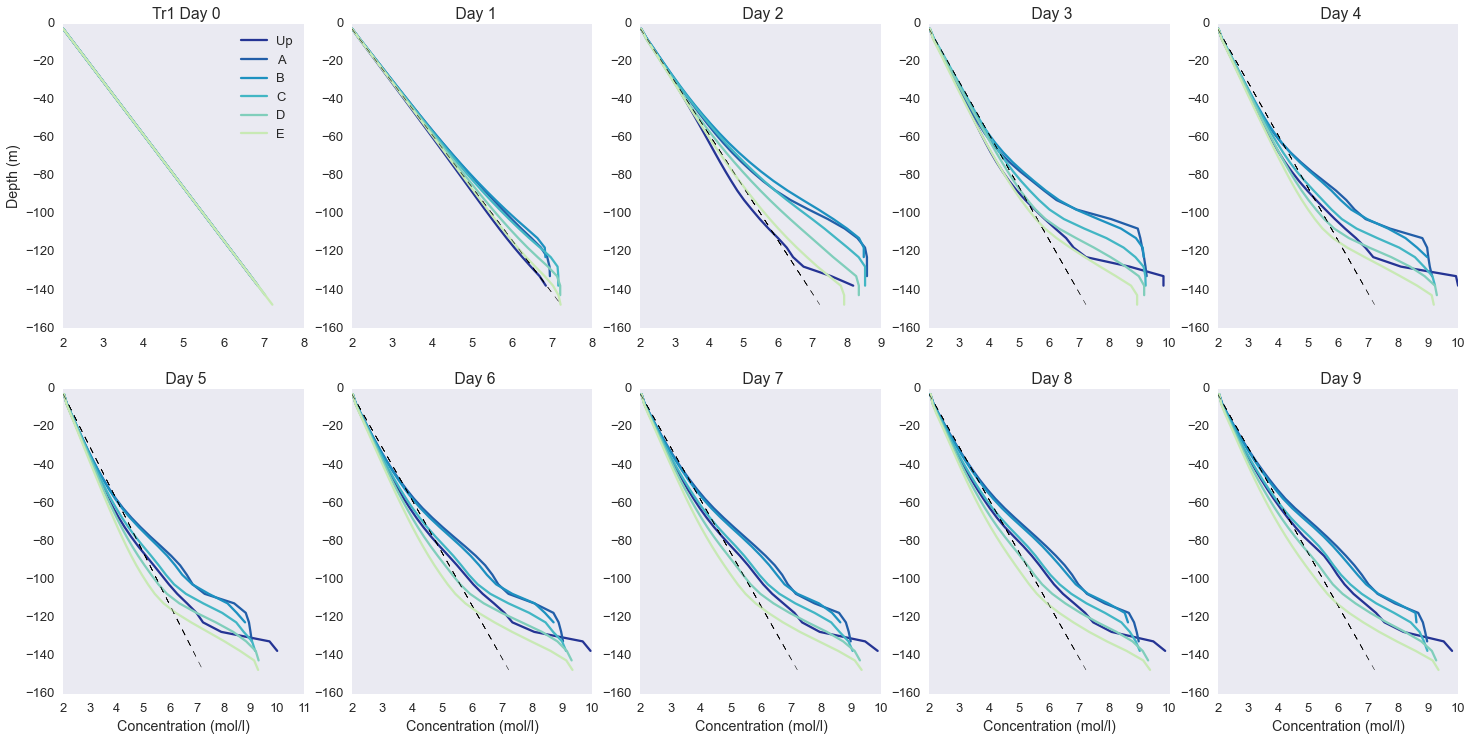

In [12]:
PlotProfiles(Tr1Masked,'YlGnBu_r','Tr1',Station,ys,xs)

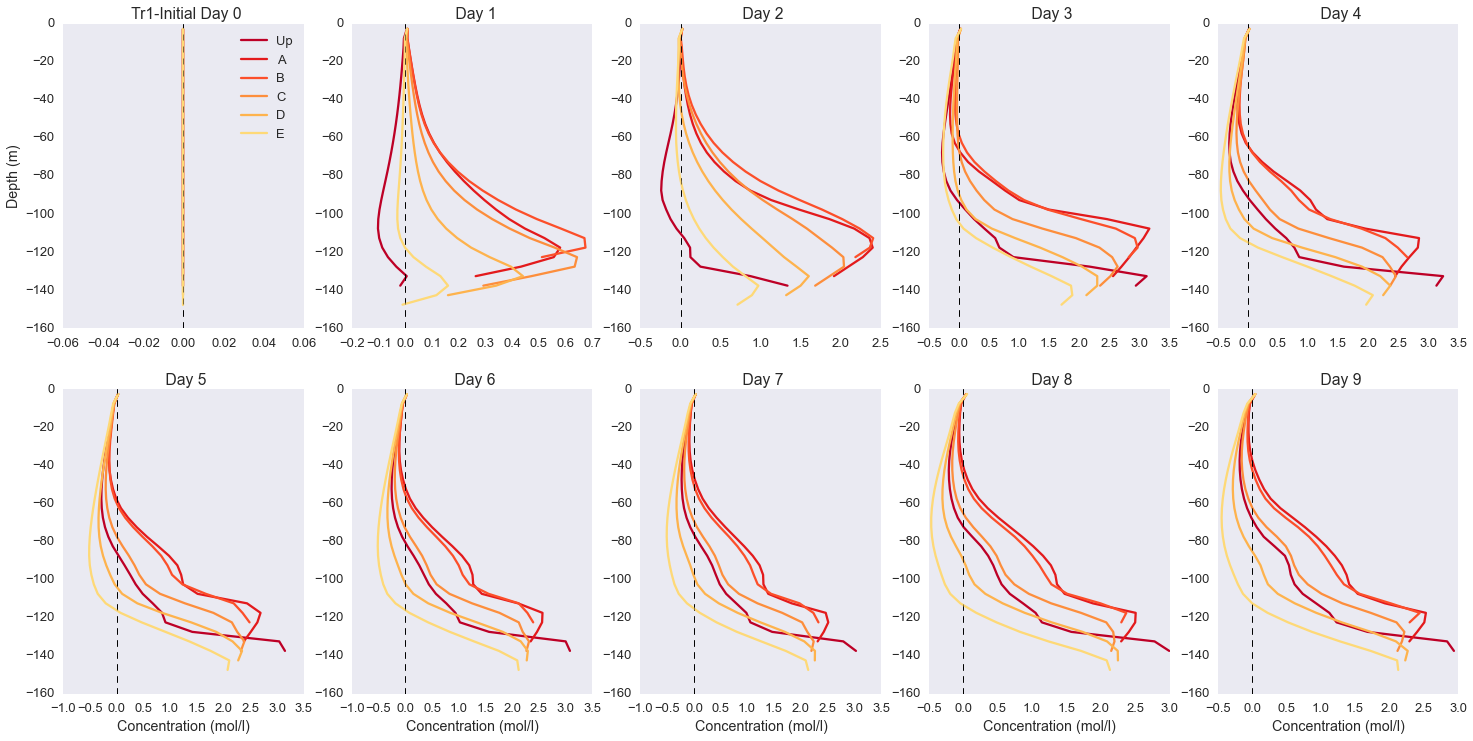

In [13]:
PlotProfilesAnom(Tr1Masked,'YlOrRd_r','Tr1',Station,ys,xs)

### Tracer 2 - $N= 3.9E^{-3}s^{-1}$

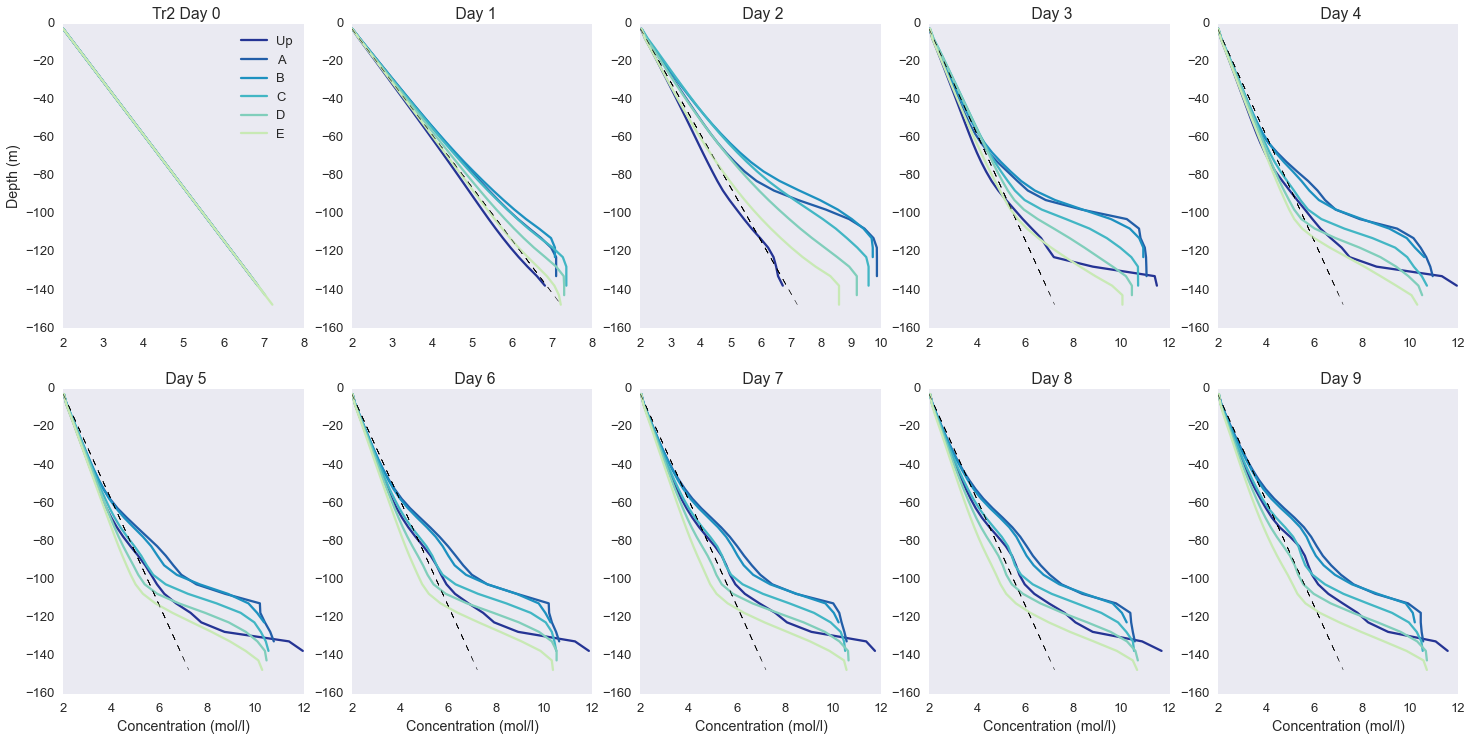

In [14]:
PlotProfiles(Tr2Masked,'YlGnBu_r','Tr2',Station,ys,xs)

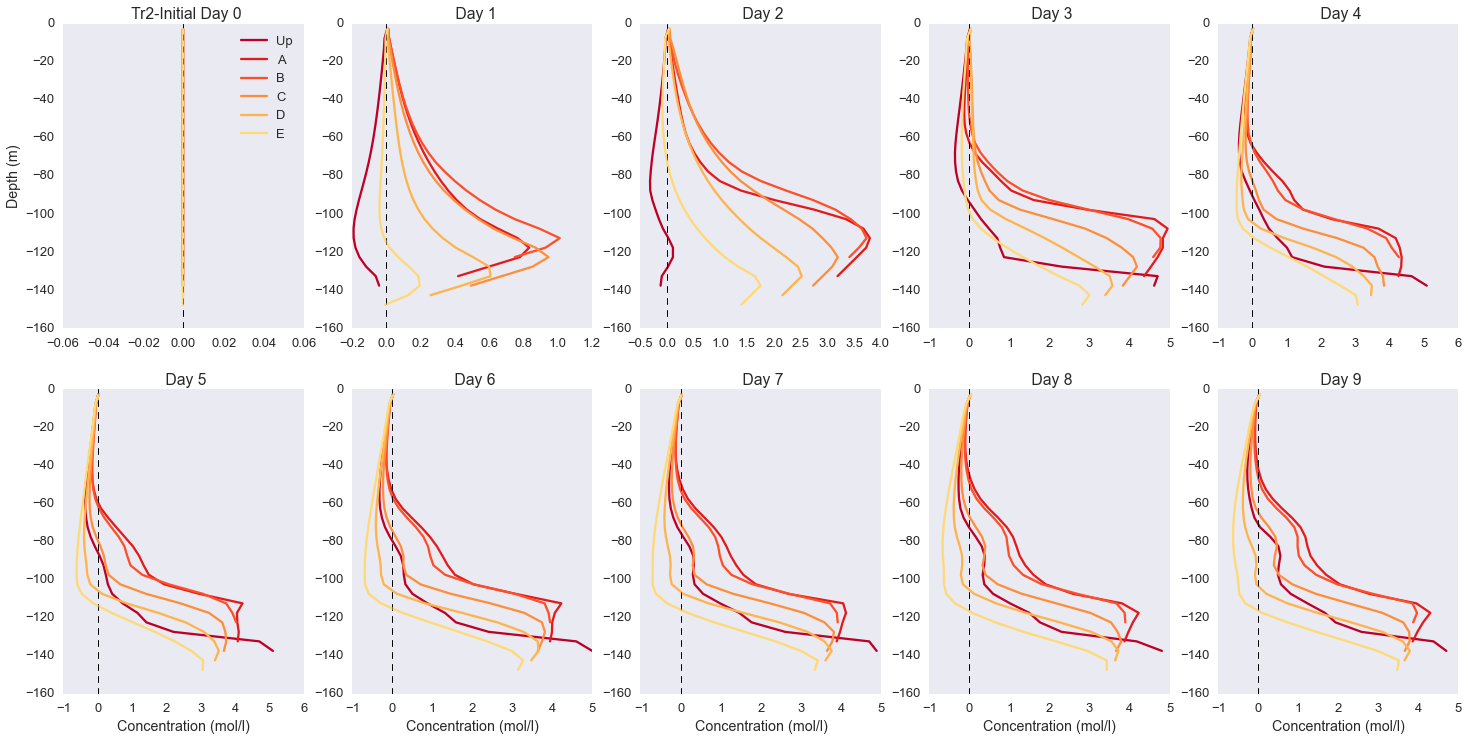

In [15]:
PlotProfilesAnom(Tr2Masked,'YlOrRd_r','Tr2',Station,ys,xs)

### Tracer 3 - $N= 6.3E^{-3}s^{-1}$

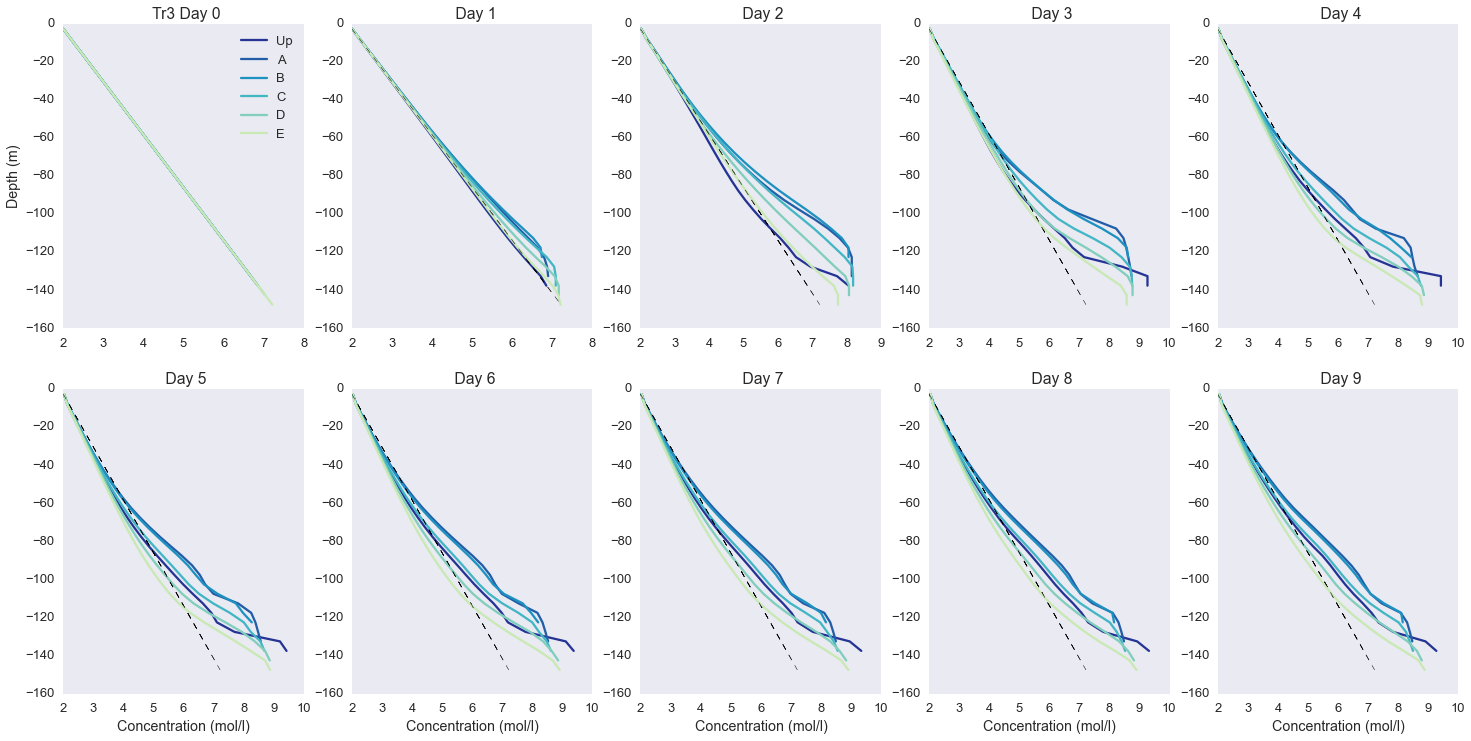

In [16]:
PlotProfiles(Tr3Masked,'YlGnBu_r','Tr3',Station,ys,xs)

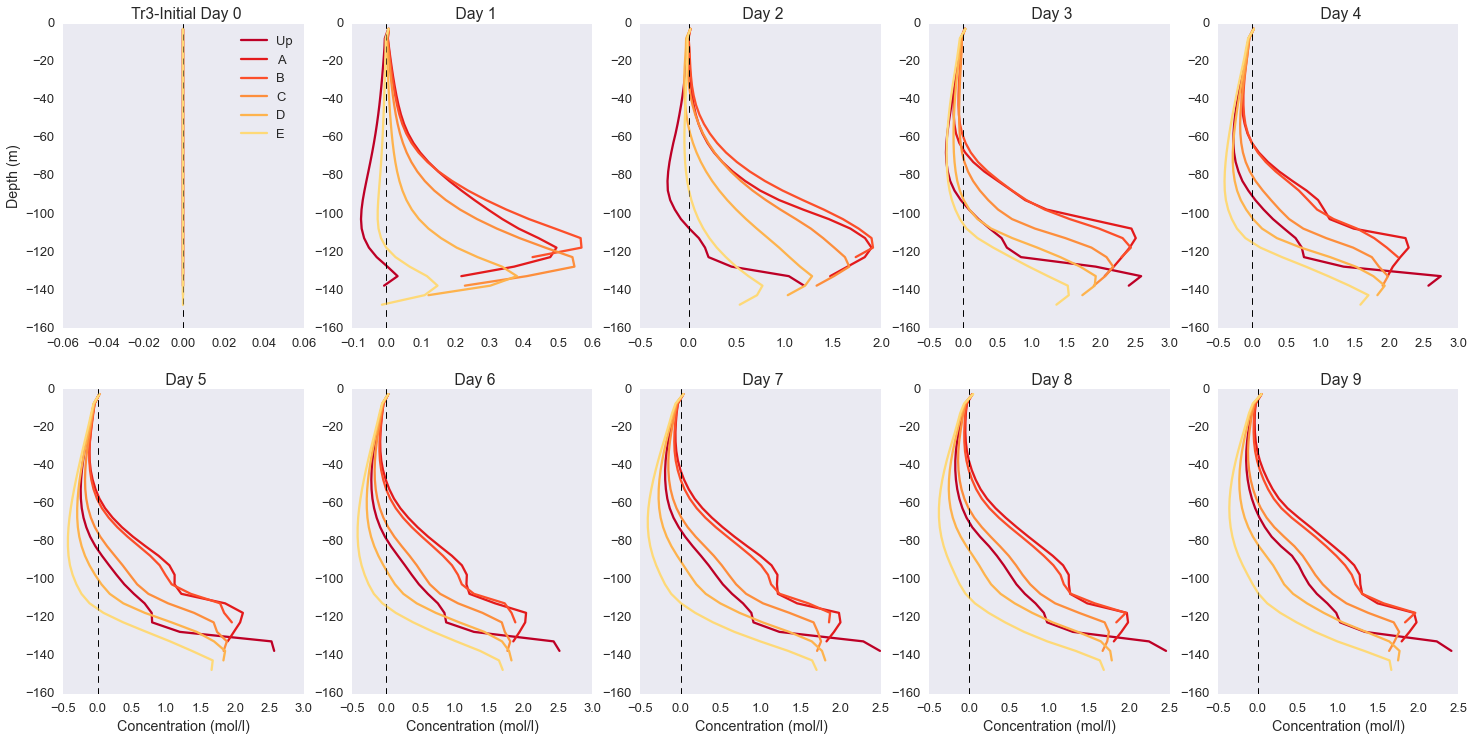

In [17]:
PlotProfilesAnom(Tr3Masked,'YlOrRd_r','Tr3',Station,ys,xs)

### Tracer 4 - $N= 3.0E^{-3}s^{-1}$

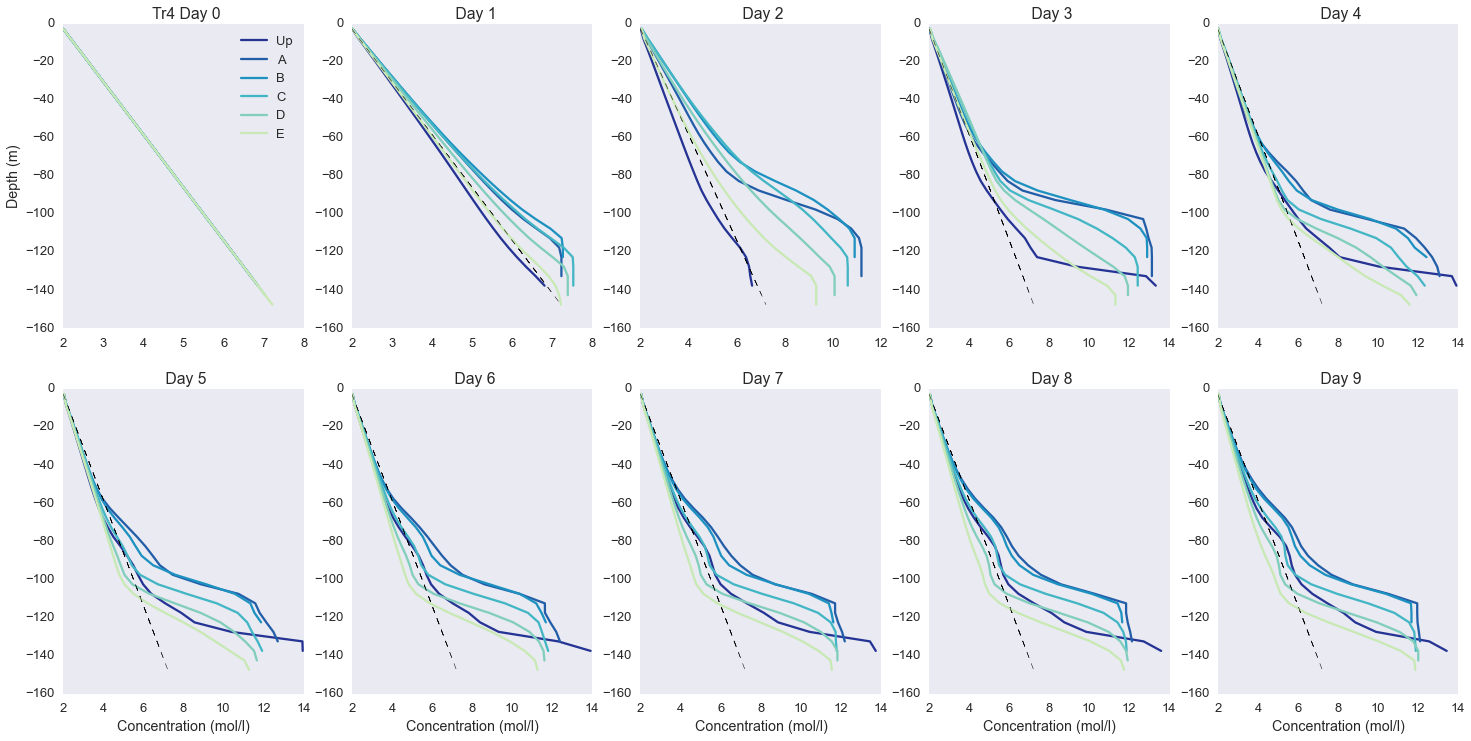

In [18]:
PlotProfiles(Tr4Masked,'YlGnBu_r','Tr4',Station,ys,xs)

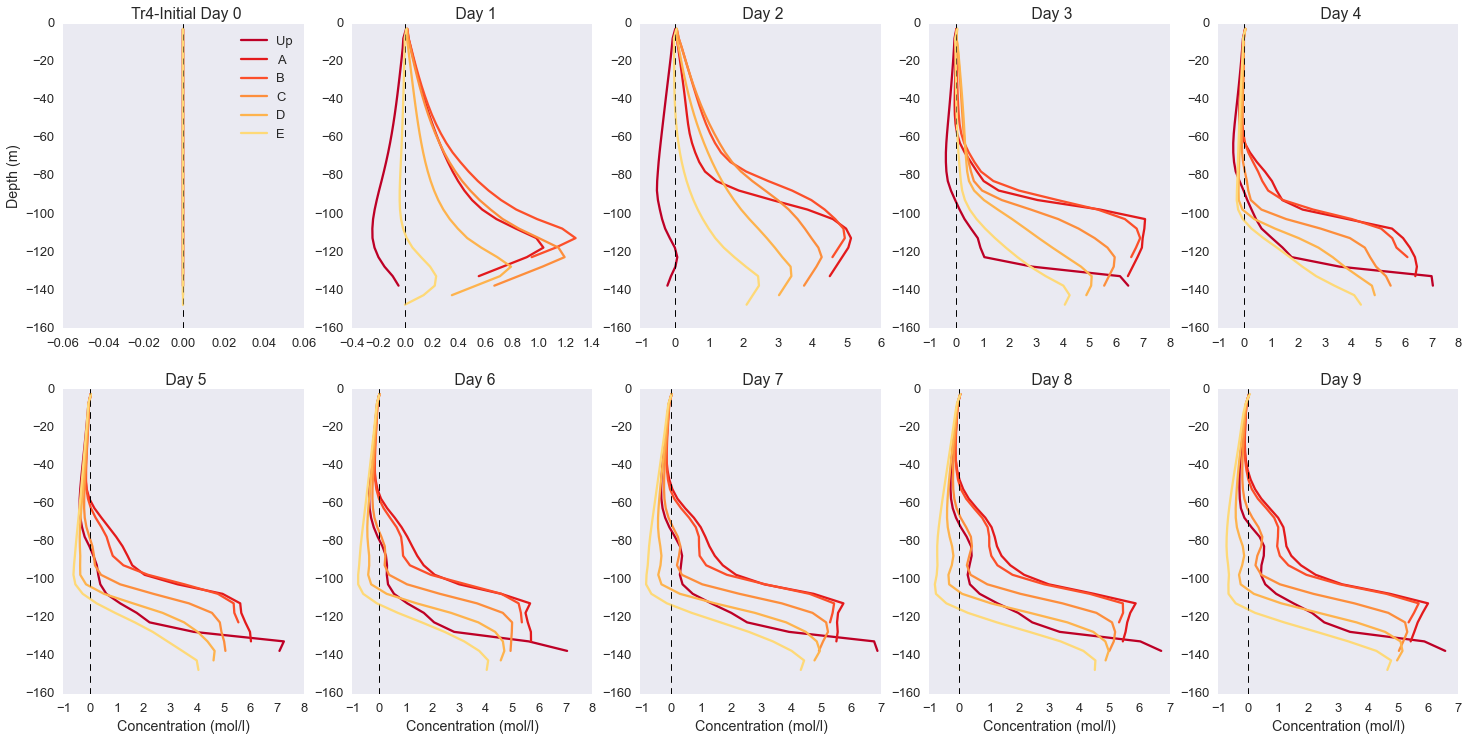

In [19]:
PlotProfilesAnom(Tr4Masked,'YlOrRd_r','Tr4',Station,ys,xs)

### Tracer 5 - $f=7.68E-5$

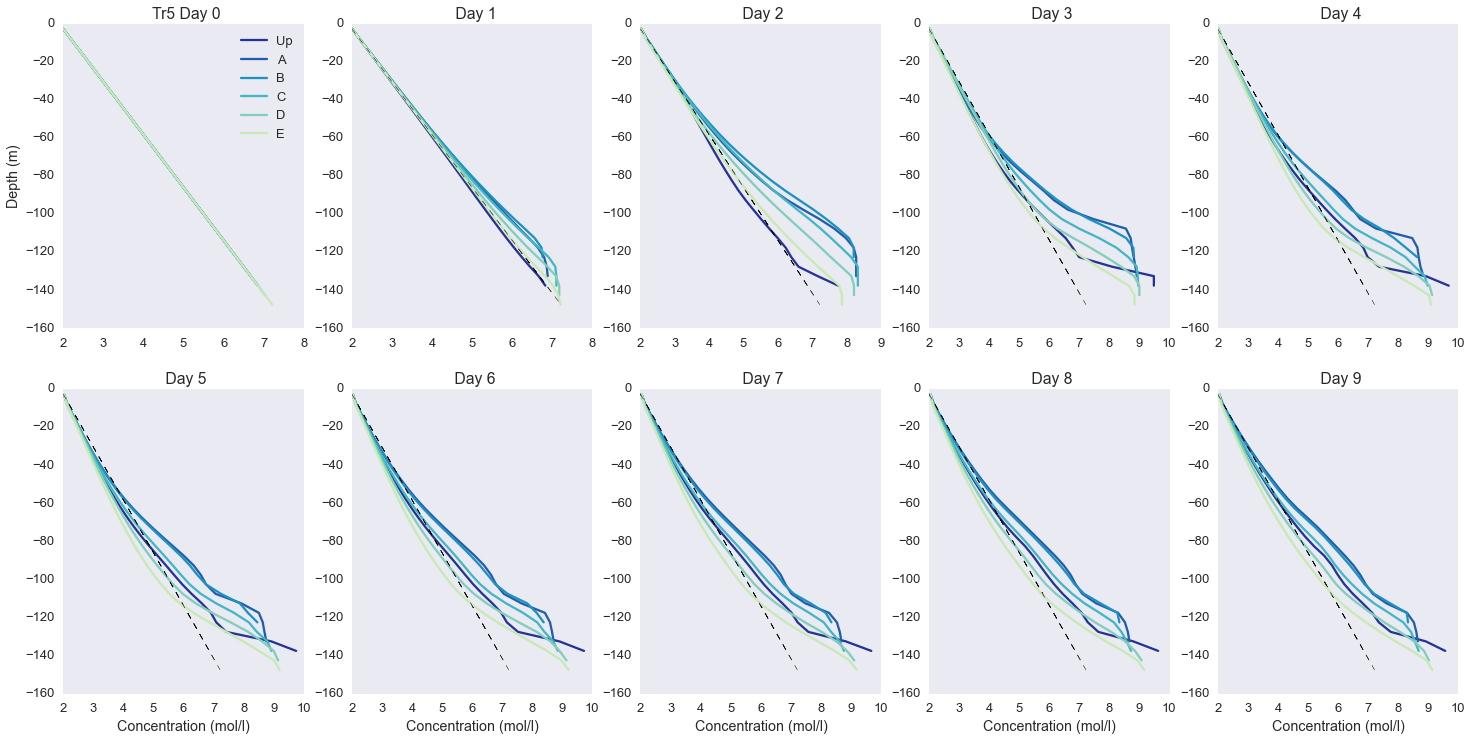

In [20]:
PlotProfiles(Tr5Masked,'YlGnBu_r','Tr5',Station,ys,xs)

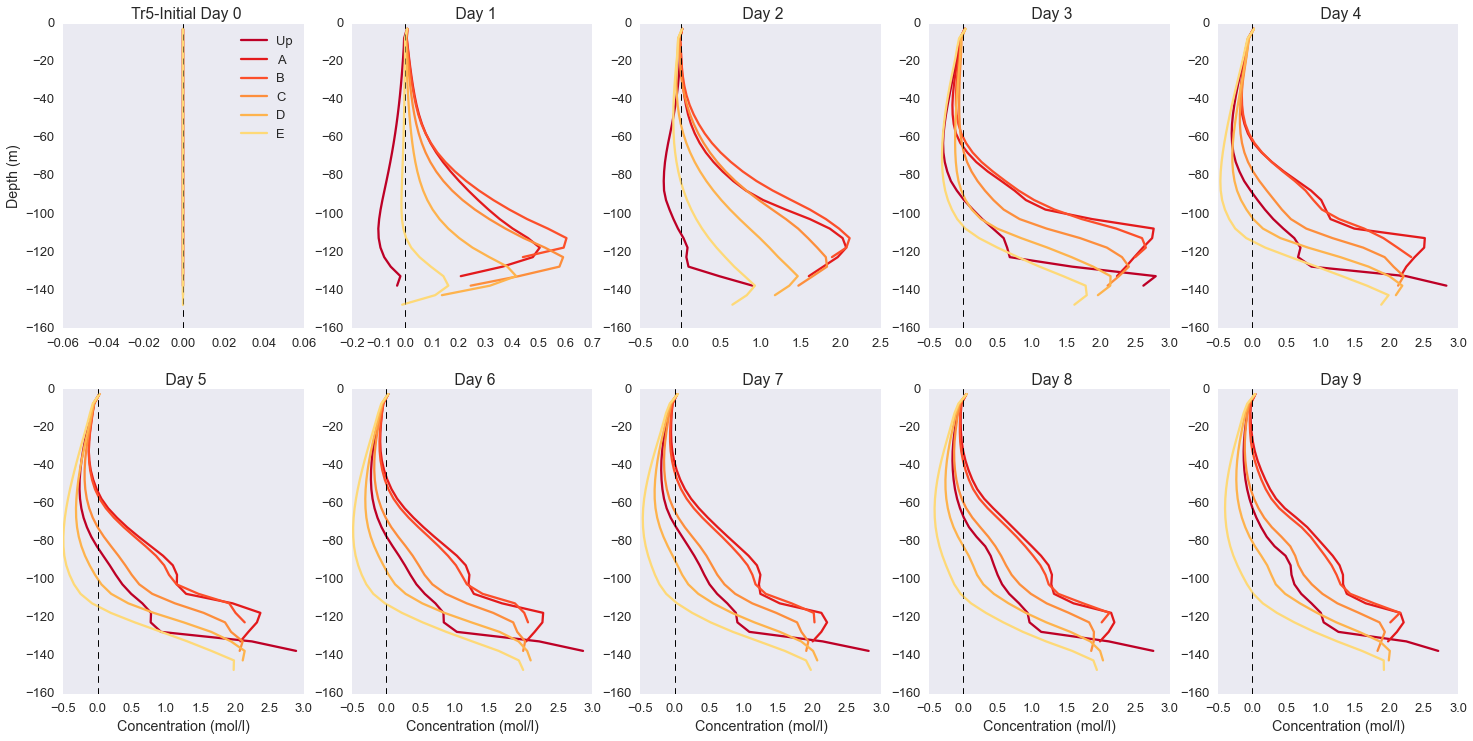

In [21]:
PlotProfilesAnom(Tr5Masked,'YlOrRd_r','Tr5',Station,ys,xs)

### Tracer 6 - $f=7.68E-5$

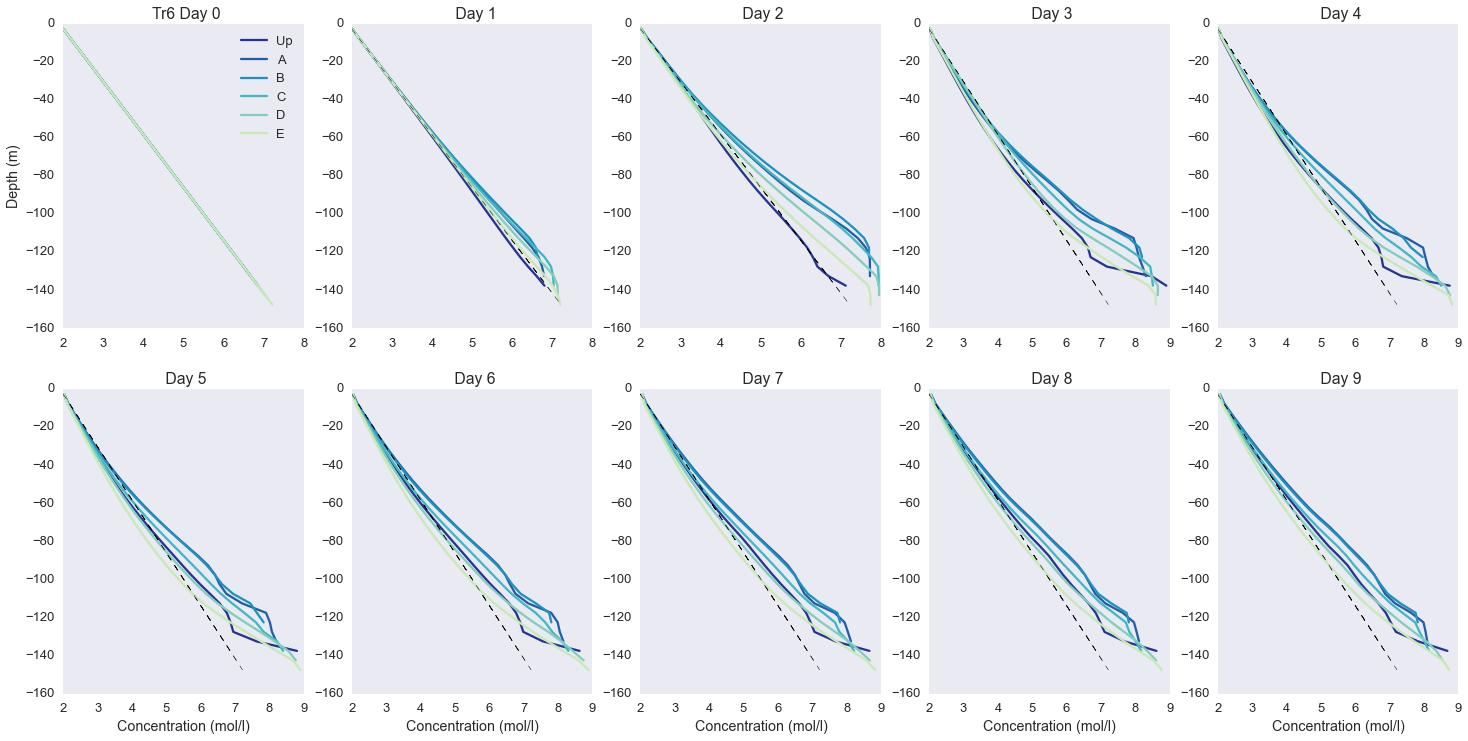

In [22]:
PlotProfiles(Tr6Masked,'YlGnBu_r','Tr6',Station,ys,xs)

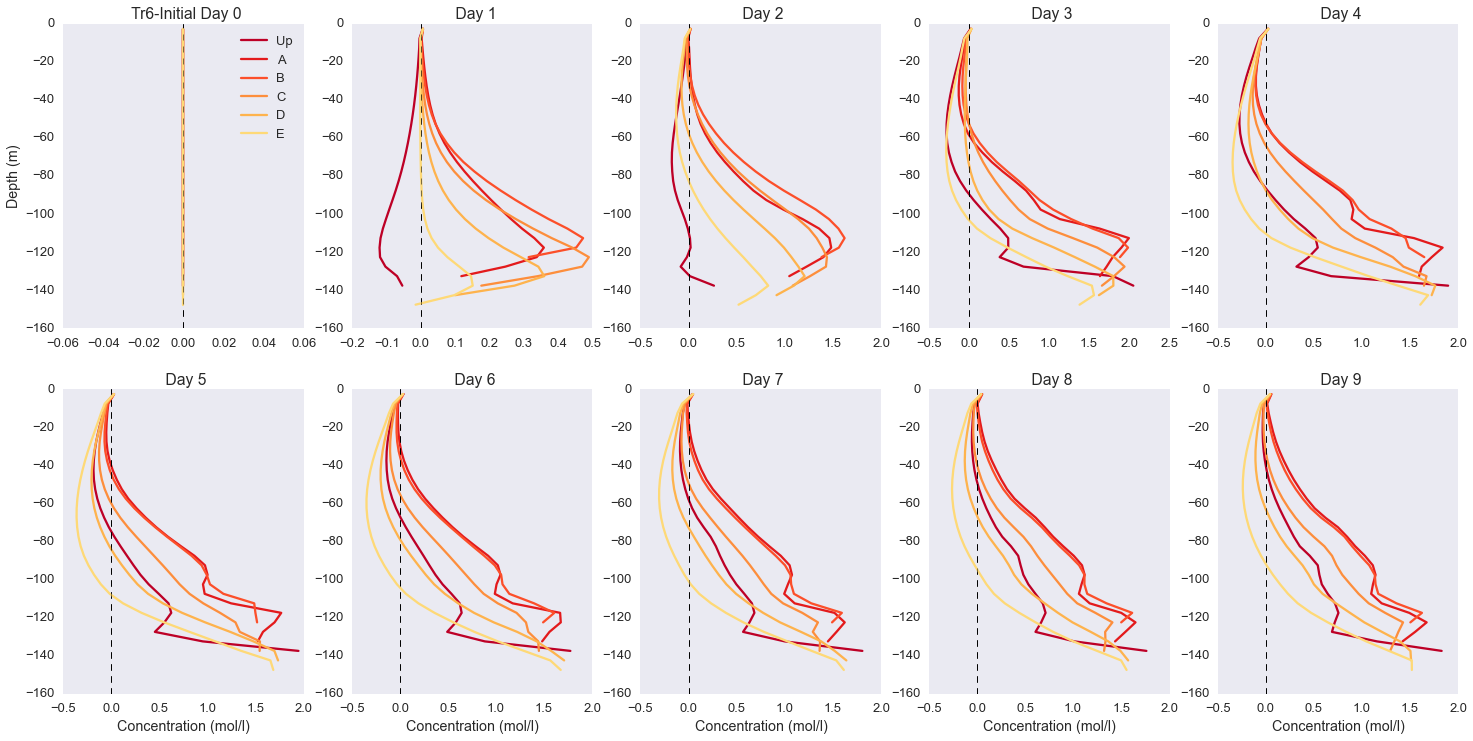

In [23]:
PlotProfilesAnom(Tr6Masked,'YlOrRd_r','Tr6',Station,ys,xs)

### Plot all initial profiles and all final profiles at A (head) and C (downstream rim)

In [24]:
def PlotInitialProfileNorm(ax,Tr,label,color,ys,xs):
    ax.plot(Tr[0,:,ys,xs]/np.max(Tr[0,:,ys,xs]), z[:],
            'o-',
            color = sns.xkcd_rgb[color],
            markersize = 6,
            label = label,
           )  

In [25]:
def PlotProfile(ax,Profile,Z,label,color):
    ax.plot(Profile, Z,
            'o-',
            color = sns.xkcd_rgb[color],
            markersize = 6,
            label = label,
           )  

In [26]:
def PlotFinalProfileNorm(ax1,ax2,ax3,Tr,label,color,ysA,xsA):
    ax1.plot(Tr[0,:,ysA,xsA]/np.max(Tr[0,:,ysA,xsA]), z[:],
            'o-',
             color = sns.xkcd_rgb[color],
             markersize = 6,
             label = label,
             )
    ax2.plot(Tr[18,:,ysA,xsA]/np.max(Tr[0,:,ysA,xsA]), z[:],
             'o-',
             color = sns.xkcd_rgb[color],
             markersize = 6,
             label = label,
             )
    ax3.plot((Tr[18,:,ysA,xsA]-Tr[0,:,ysA,xsA])/np.max(Tr[0,:,ysA,xsA]), z[:],
             'o-',
             color = sns.xkcd_rgb[color],
             markersize = 6,
             label = label,
             )
    ax1.set_title(' Initial profiles at head'  )
    ax1.set_ylabel('Depth (m)')
    ax1.set_xlabel('$C_0$ / $\max(C_0)$')

    ax2.set_title(' Final profiles at head'  )
    ax2.set_xlabel('$C_f$ / $\max(C_0)$')
    
    ax3.set_title(' Difference '  )
    ax3.set_xlabel('$\Delta C$ / $\max(C_0)$')
        

In [27]:
def PlotFinalProfileNormVel(ax1,ax2,ax3,Tr,label,color,ysA,xsA):
    ax1.plot(Tr[6,:,ysA,xsA], z[:],
            'o-',
             color = sns.xkcd_rgb[color],
             markersize = 6,
             label = label,
             )
    ax2.plot(Tr[18,:,ysA,xsA], z[:],
             'o-',
             color = sns.xkcd_rgb[color],
             markersize = 6,
             label = label,
             )
    ax3.plot((Tr[18,:,ysA,xsA]-Tr[6,:,ysA,xsA]), z[:],
             'o-',
             color = sns.xkcd_rgb[color],
             markersize = 6,
             label = label,
             )
    
    ax1.set_title(' Initial profiles at head'  )
    ax1.set_ylabel('Depth (m)')
    ax1.set_xlabel('$V_{td}$ m/s ')

    ax2.set_title(' Final profiles at head'  )
    ax2.set_xlabel('$V_f$ m/s')

    ax3.set_title(' Difference '  )
    ax3.set_xlabel('$\Delta V$ m/s ')
    

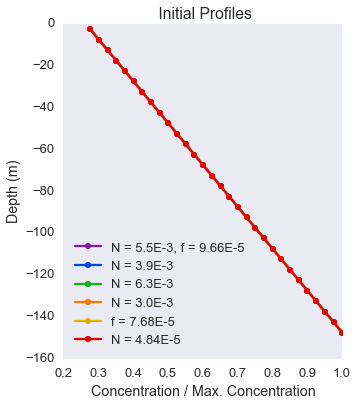

In [28]:
fig,ax1 = plt.subplots(1, 1, figsize=(5, 6))
labels = ['N = 5.5E-3, f = 9.66E-5','N = 3.9E-3','N = 6.3E-3','N = 3.0E-3','f = 7.68E-5','N = 4.84E-5']

sns.set(context='talk', style='dark', font='sans-serif', font_scale=1)
col = ['purple',
       'blue',
       'green',
       'orange',
       'gold',
       'red',
       ]
          

for tr, lab, color in zip([Tr1Masked,Tr2Masked, Tr3Masked, Tr4Masked,
                    Tr5Masked, Tr6Masked],
                    labels,col
                   ):
    PlotInitialProfileNorm(ax1,tr,lab,color,ys[5],xs[5])

ax1.set_title(' Initial Profiles'  )
ax1.set_xlabel('Concentration / Max. Concentration')
ax1.set_ylabel('Depth (m)')
ax1.legend(loc=0)
plt.show()
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')

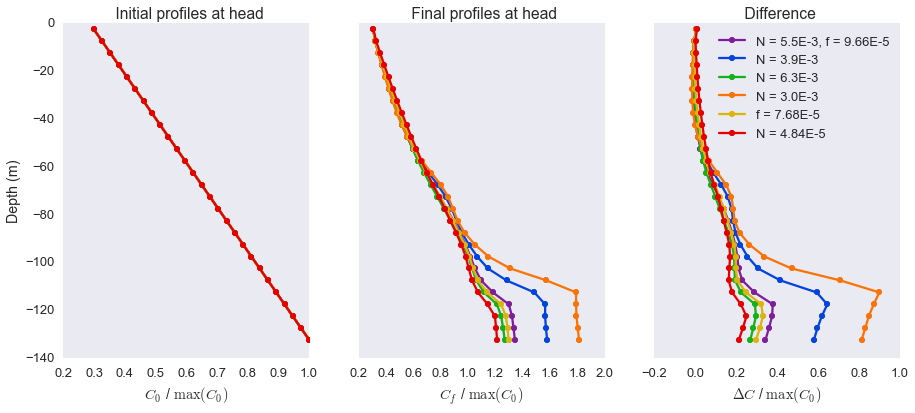

In [29]:
fig,(ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 6), sharey=True )
labels = ['N = 5.5E-3, f = 9.66E-5','N = 3.9E-3','N = 6.3E-3','N = 3.0E-3','f = 7.68E-5','N = 4.84E-5']

sns.set(context='talk', style='dark', font='sans-serif', font_scale=1)
col = ['purple',
       'blue',
       'green',
       'orange',
       'gold',
       'red',
       'magenta',
       'teal']
          

for tr, lab, color in zip([Tr1Masked,Tr2Masked, Tr3Masked, Tr4Masked,
                    Tr5Masked, Tr6Masked],
                    labels,col
                   ):
    PlotFinalProfileNorm(ax1,ax2,ax3,tr,lab,color,ys[1],xs[1])

ax3.legend(loc=0)
   
plt.show()
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')

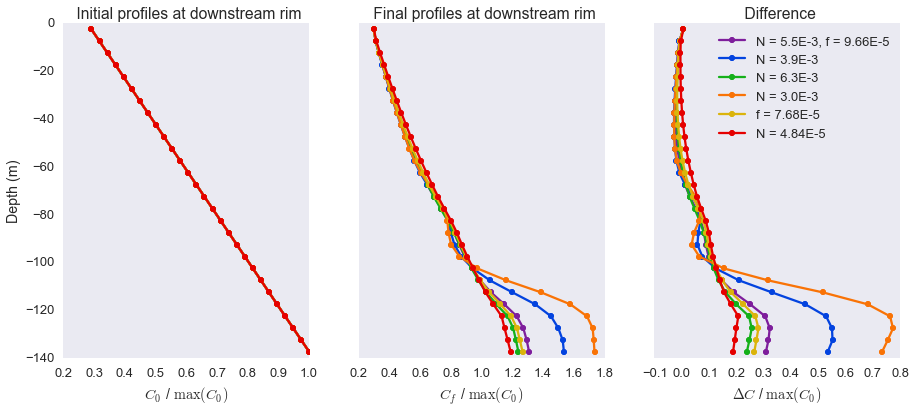

In [30]:
fig,(ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 6), sharey=True )
labels = ['N = 5.5E-3, f = 9.66E-5','N = 3.9E-3','N = 6.3E-3','N = 3.0E-3','f = 7.68E-5','N = 4.84E-5']

sns.set(context='talk', style='dark', font='sans-serif', font_scale=1)
col = ['purple',
       'blue',
       'green',
       'orange',
       'gold',
       'red',
       'magenta',
       'teal']
          

for tr, lab, color in zip([Tr1Masked,Tr2Masked, Tr3Masked, Tr4Masked,
                    Tr5Masked, Tr6Masked],
                    labels,col
                   ):
    PlotFinalProfileNorm(ax1,ax2,ax3,tr,lab,color,ys[3],xs[3])

ax3.legend(loc=0)
ax1.set_title(' Initial profiles at downstream rim'  )
ax1.set_ylabel('Depth (m)')
ax1.set_xlabel('$C_0$ / $\max(C_0)$')

ax2.set_title(' Final profiles at downstream rim'  )
ax2.set_xlabel('$C_f$ / $\max(C_0)$')
    
ax3.set_title(' Difference '  )
ax3.set_xlabel('$\Delta C$ / $\max(C_0)$')
           
plt.show()
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')

## Velocity components at stations
The idea is to see what the core of the upwelling current looks like at these stations and try to correlate the depth of the core to the depth of max gradients of the initial profiles to see if the larger the gradient within the vel core the larger the final concentration effect.


In [31]:
Ustag = rout.getField(CanyonState,'U') # 
Vstag = rout.getField(CanyonState,'V')

U,V = rout.unstagger(Ustag,Vstag)
UMasked = np.ma.masked_array(U,mask = MaskTr) 
VMasked = np.ma.masked_array(V,mask = MaskTr) 


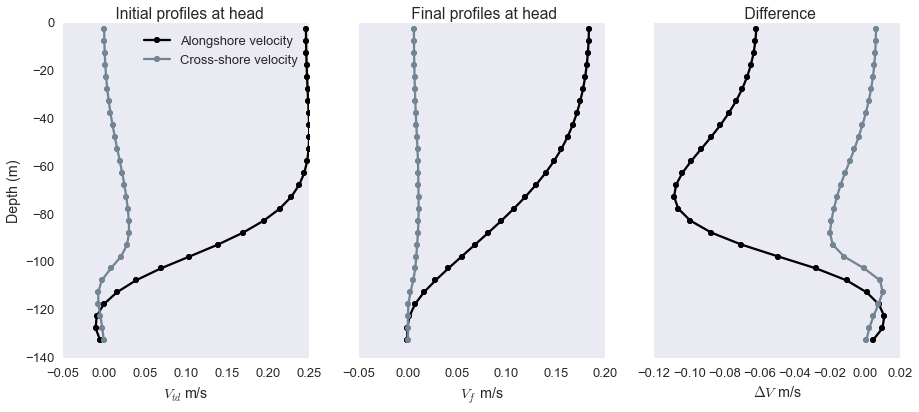

In [32]:
fig,(ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 6), sharey=True )
labels = ['Alongshore velocity', 'Cross-shore velocity']

sns.set(context='talk', style='dark', font='sans-serif', font_scale=1)
col = ['black',
      'steel',
      ]

for tr, lab, color in zip([UMasked, VMasked],
                    labels,col,
                   ):
    PlotFinalProfileNormVel(ax1,ax2,ax3,tr,lab,color,ys[1],xs[1])
    
ax1.legend(loc=0)
   
plt.show()
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')




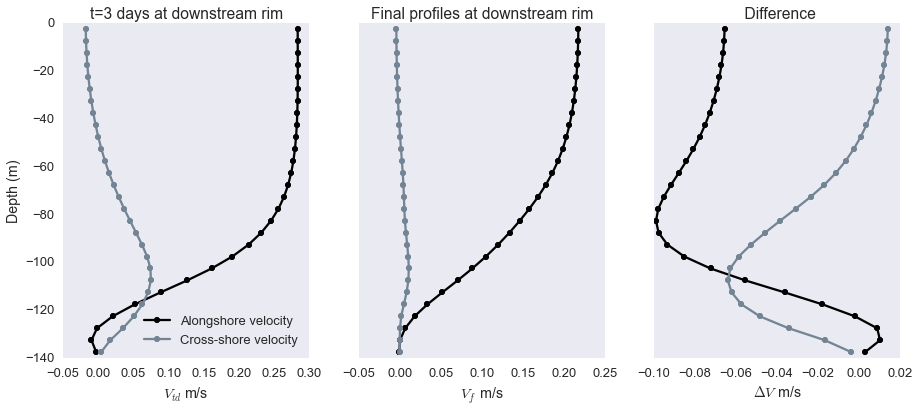

In [33]:
fig,(ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 6), sharey=True )
labels = ['Alongshore velocity', 'Cross-shore velocity']

sns.set(context='talk', style='dark', font='sans-serif', font_scale=1)
col = ['black',
      'steel',
      ]

for tr, lab, color in zip([UMasked, VMasked],
                    labels,col,
                   ):
    PlotFinalProfileNormVel(ax1,ax2,ax3,tr,lab,color,ys[3],xs[3])
    
ax1.legend(loc=0)
ax1.set_title('t=3 days at downstream rim')   
ax2.set_title('Final profiles at downstream rim')   

plt.show()
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')



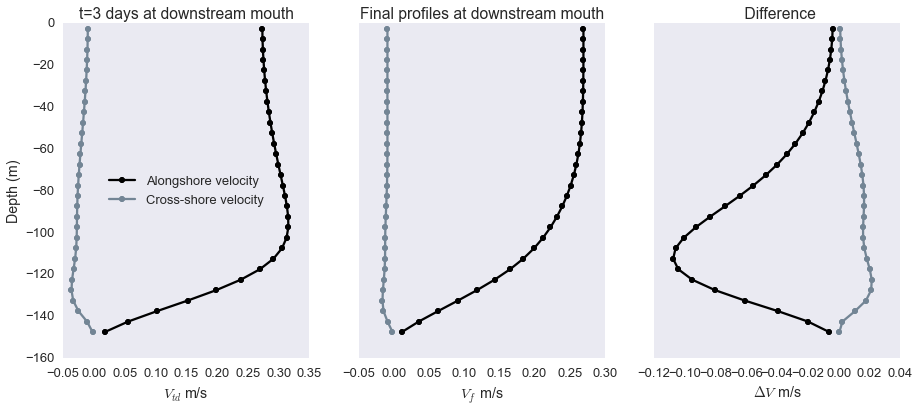

In [34]:
fig,(ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 6), sharey=True )
labels = ['Alongshore velocity', 'Cross-shore velocity']

sns.set(context='talk', style='dark', font='sans-serif', font_scale=1)
col = ['black',
      'steel',
      ]

for tr, lab, color in zip([UMasked, VMasked],
                    labels,col,
                   ):
    PlotFinalProfileNormVel(ax1,ax2,ax3,tr,lab,color,ys[5],xs[5])
    
ax1.legend(loc=0)
ax1.set_title('t=3 days at downstream mouth')   
ax2.set_title('Final profiles at downstream mouth')   

plt.show()
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')



## Tracer gradients

In [35]:
def derivative(profile, rc, start, end):
    Der = (profile[start+2:end]-profile[start:end-2]) / ((-rc[start+2:end])-(-rc[start:end-2]))
    return Der

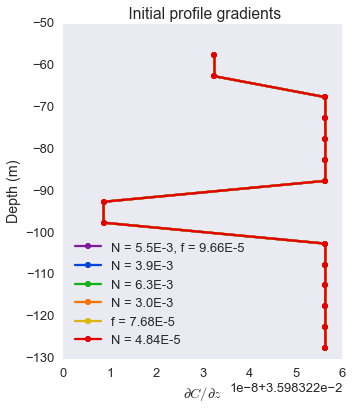

In [36]:
fig,ax1 = plt.subplots(1, 1, figsize=(5, 6))
labels = ['N = 5.5E-3, f = 9.66E-5','N = 3.9E-3','N = 6.3E-3','N = 3.0E-3','f = 7.68E-5','N = 4.84E-5']

sns.set(context='talk', style='dark', font='sans-serif', font_scale=1)
col = ['purple',
       'blue',
       'green',
       'orange',
       'gold',
       'red',
       'magenta',
       'teal',]
  
for tr, lab, color in zip([Tr1Masked,Tr2Masked,Tr3Masked, Tr4Masked,
                    Tr5Masked, Tr6Masked],
                    labels,col
                   ):
    profileDer = derivative(tr[0,:,ys[1],xs[1]], rc, 0, 89)
    PlotProfile(ax1,profileDer[10:],z[11:-2],lab,color)
ax1.set_title(' Initial profile gradients'  )
ax1.set_xlabel('$\partial C/\partial z$ ')
ax1.set_ylabel('Depth (m)')
ax1.legend(loc=0)
plt.show()
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')


### Upstream shelf

In [37]:
# upstream shelf station y 230, x 60
ysUpSh = 230
xsUpSh = 60

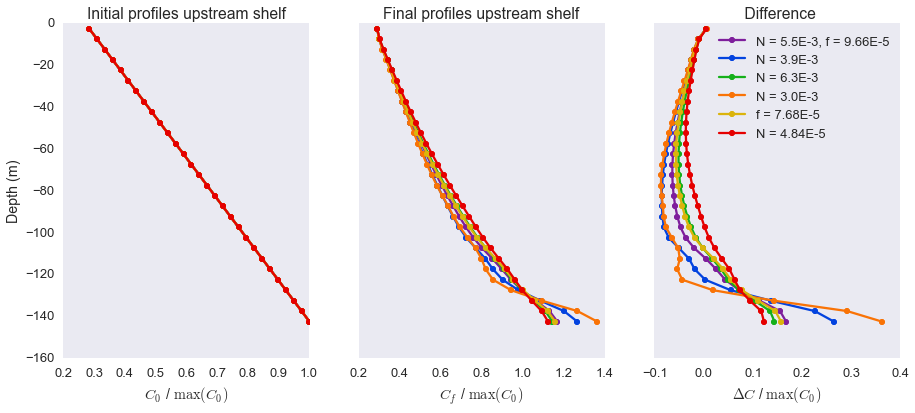

In [38]:
fig,(ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 6), sharey=True )
labels = ['N = 5.5E-3, f = 9.66E-5','N = 3.9E-3','N = 6.3E-3','N = 3.0E-3','f = 7.68E-5','N = 4.84E-5']

sns.set(context='talk', style='dark', font='sans-serif', font_scale=1)

col = ['purple',
       'blue',
       'green',
       'orange',
       'gold',
       'red',
       'magenta',
       'teal',]
          

for tr, lab, color in zip([Tr1Masked,Tr2Masked, Tr3Masked, Tr4Masked,
                    Tr5Masked, Tr6Masked],
                    labels,col
                   ):
    PlotFinalProfileNorm(ax1,ax2,ax3,tr,lab,color,ysUpSh,xsUpSh)

ax3.legend(loc=0)
ax1.set_title('Initial profiles upstream shelf')   
ax2.set_title('Final profiles upstream shelf')   

plt.show()
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')